# CS105 Final Project

## 1.0 Library imports

In [228]:
import pandas as pd
import numpy as np
import json
import gzip
import warnings
warnings.filterwarnings("ignore")

## 2.0 Meet and greet the data

### 2.1 Load in data
- Call function parse(path)
- Call funcation getDF(path)
- Return the dataframe in its correct form
- A dataset should be split into two forms
    - One will contain our main dataframe which will not be touched unless for comparisons with our modified df
    - The second will contain our changed dataframe

In [229]:

def parse(path):
  """ This function will parse the json file and returns the memory of all the rows

  Args:
      path (string): path directory of where your data is saved on your computer

  Yields:
      object: json
  """
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

In [230]:
def getDF(path):
    """ This function will go through each row in the parse function and get the data into a pandas format

    Args:
        path (string): path directory of where your data is saved on your computer

    Returns:
       dataframe: main dataframe that holds our data
    """
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [231]:
# df = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')
# data_copy = getDF(r'C:\Users\migue\Downloads\Cell_Phones_and_Accessories_5.json.gz')

df = getDF('Cell_Phones_and_Accessories_5.json.gz')
data_copy = getDF('Cell_Phones_and_Accessories_5.json.gz')

### 2.2 Get familiar with the data 
- Get info from dataframe
- Get a random sample
- Check the length of the df
- Check dtypes 

In [232]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 104.4+ MB


In [233]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
114687,1.0,True,"12 30, 2014",A2PVJ8XM6CLBHG,B007L5NKZO,"{'Size:': ' Only Bluetooth 2.0', 'Color:': ' B...",Jennifer Walker,H-o-r-r-i-b-l-e!!!,One Star,1419897600,NaN,NaN


In [234]:
print("The total length of the dataset: ", len(data_copy))

The total length of the dataset:  1128437


In [235]:
print("The data types of each respective column: ")
print(data_copy.dtypes)

The data types of each respective column: 
overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
image              object
dtype: object


In [236]:
print("The shape of the dataset: ", data_copy.shape)

The shape of the dataset:  (1128437, 12)


In [237]:
print("Statistical analysis of the numerical values in the dataset: ")
data_copy.describe().transpose()

Statistical analysis of the numerical values in the dataset: 


,count,mean,std,min,25%,50%,75%,max
overall,1128437.0,4.221383e+00,1.231917e+00,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,1128437.0,1.440400e+09,4.569215e+07,1.035331e+09,1.416355e+09,1.444349e+09,1.470442e+09,1.538438e+09


In [238]:
print(data_copy.groupby('overall').size())
#MAKE THIS A CHART


overall
1.0     81539
2.0     57175
3.0     98254
4.0    184431
5.0    707038
dtype: int64


In [239]:
data_copy['overall'].describe()

count    1.128437e+06
mean     4.221383e+00
std      1.231917e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [240]:
print("Skewness: %f" % data_copy['overall'].skew())
print("Kurtosis: %f" % data_copy['overall'].kurt())

Skewness: -1.516705
Kurtosis: 1.098529


Based off the kurtosis we have no outliers since our data is < 3.0. Our skewness is negative meaning we have a long tail on the left side of the graph.

### Relationship with Numerical Variables

The only numerical value is the unix review time column, which is pointless so we will drop this column anyways. We will run a feature selection later on to determine if my hypothesis is correct.

### Relationship with Binary Variables

In [241]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
109511,5.0,True,"05 27, 2014",A2YBML2AISHB6F,B0079CIEZA,NaN,P. Hargraves,Having previously scratched displays of other ...,Protect your Nokia 920 display,1401148800,NaN,NaN


<AxesSubplot: xlabel='overall'>

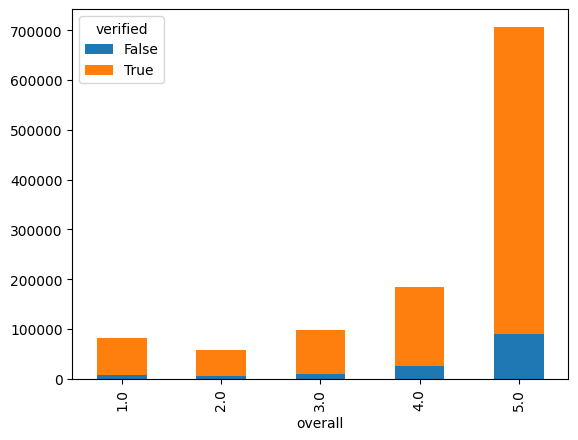

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt


data_copy.groupby(['overall', 'verified']).size().unstack().plot(kind='bar', stacked=True)

### Relationship with Categorical Variables

In [243]:
df_agg = data_copy.groupby(['overall', 'asin']).size()

In [244]:
df_agg.nlargest(10)

overall  asin      
5.0      B00VH88CJ0    1426
         B00X5RV14Y    1311
         B019PV2I3G    1282
         B00P7N0320    1258
         B018JW3EOY    1252
         B005NF5NTK    1224
         B00MQSMDYU    1090
         B00M51DDT2    1023
         B00G7UY3EG    1014
         B00IGISUTG     910
dtype: int64

## 3.0 The 4 C's of data cleaning: completing, correction, creating, and converting

### 3.1 Completing 
- Completing missing information

In [245]:
data_copy.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64

In [246]:
def get_nan_ocols(df, nan_percent=0.7):
    """ This function will determine what columns to drop based on our threshold

    Args:
        df (pandas df): dataframe that holds our data
        nan_percent (float, optional): Defaults to 0.7.

    Returns:
        list: list of columns to drop based on our threshold
    """
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if df[c].isnull().sum() >= threshold]

In [247]:
cols_to_del = get_nan_ocols(data_copy, .7)
cols_to_del

['vote', 'image']

In [248]:
data_copy = data_copy.drop(['vote', 'image'], axis=1)

In [249]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
750119,4.0,False,"09 20, 2015",A1J5HIF41ENSMZ,B00YEGPROK,{'Color:': ' Solo6-Plus-White'},Adam Wood,"<div id=""video-block-R1ZGRZUNKJ9HT5"" class=""a-...","Solid bank with great capacity, but a bit larg...",1442707200


In [250]:
data_copy = data_copy.drop(['style'], axis=1)

In [251]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
1043751,5.0,True,"12 10, 2015",A257QS1T6O9AQV,B006RI3P6U,Lisa C,A great phone case!!! The glittery back is se...,Pretty case,1449705600


In [252]:
data_copy.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName      135
reviewText        765
summary           517
unixReviewTime      0
dtype: int64

In [253]:
data_copy = data_copy.drop(['reviewerName'], axis=1)

In [254]:
data_copy = data_copy.dropna(axis=0)

In [255]:
data_copy.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [256]:
data_copy.sample(1)

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
819948,5.0,True,"10 16, 2016",A2NXZPBY73MQ9W,B013R6TG0I,Fits just like one I bought from Verizon and t...,Good buy and good fit.,1476576000


### 3.2 Correction
- Correcting values and outliers
- We could have possible outliers in any of the numeric columns

There are no outliers in the 'unixReviewTime' column because there are no outliers in time.

### 3.3 Feature engineering
- Creating new features for analysis

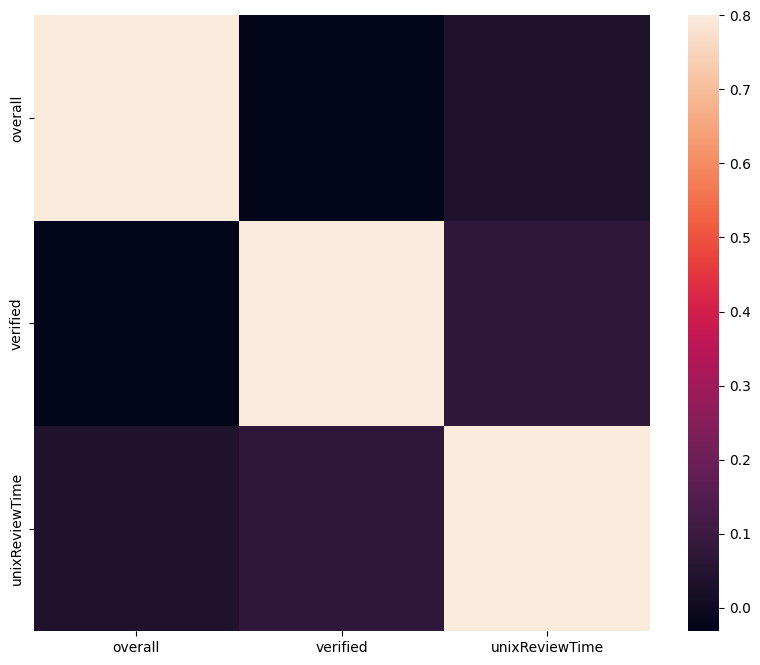

In [257]:
corrmat = data_copy.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, vmax=.8, square=True);

In [258]:
from collections import Counter

Counter(" ".join(data_copy["reviewText"]).split()).most_common(10)

[('the', 2643224),
 ('I', 1574142),
 ('and', 1544972),
 ('a', 1387653),
 ('to', 1370796),
 ('it', 1142523),
 ('is', 967868),
 ('my', 734072),
 ('for', 723219),
 ('of', 714386)]

### 3.4 Converting 
- Converting fields to the correct format for calculations and presentation

## 4.0 Build model

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #used for one-hot encoding

temp = data_copy[:10000]

le = LabelEncoder() 
y = le.fit_transform(temp['overall'].values)

In [260]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

In [261]:
X = temp['reviewText']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state=69
)

In [262]:
print(X_train.shape)
X_test.shape

(8000,)


(2000,)

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(list(X_train) + list(X_test)) #if the vectorizer is not same size as dataset, then the code breaks

X_train_vectorizer = vectorizer.transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

In [264]:
pd_array = pd.DataFrame(X_train_vectorizer.toarray()) #helps visual the one-hot encoding for you guys to read
pd_array

,0,1,2,3,4,5,6,7,8,9,...,16983,16984,16985,16986,16987,16988,16989,16990,16991,16992
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def print_confusion_matrix(y_test, y_pred):
    cmatrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cmatrix)
    cm_display.plot();

In [277]:
from sklearn.metrics import classification_report

def print_classification_report(y_test, y_pred, model_name):
    print("Classification report for " + str(model_name) + ": ")
    print(classification_report(y_test, y_pred, digits=4))

In [278]:
from sklearn.linear_model import LogisticRegression

accuracy_metric = {}

lr_model = LogisticRegression()
lr_model.fit(X_train_vectorizer, y_train)

lr_y_pred = lr_model.predict(X_test_vectorizer)

acc = lr_model.score(X_test_vectorizer, y_test)*100
accuracy_metric['Logistic Regression'] = acc

print("Logistic Regression Accuracy:  {:.2f}%".format(acc))

Logistic Regression Accuracy:  61.65%


In [279]:
from xgboost import  XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_vectorizer, y_train)

xg_y_pred = xg.predict(X_test_vectorizer)

acc = xg.score(X_test_vectorizer, y_test)*100
accuracy_metric['XGBoost'] = acc
print("XGBoost Accuracy:  {:.2f}%".format(acc))


XGBoost Accuracy:  65.10%


In [280]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train_vectorizer, y_train)

nb_y_pred = nb_model.predict(X_test_vectorizer)
predictions = [round(value) for value in nb_y_pred]

acc = nb_model.score(X_test_vectorizer, y_test)*100
accuracy_metric['Naive Bayes'] = acc

print("Naive Bayes Accuracy:  {:.2f}%".format(acc))

Naive Bayes Accuracy:  51.45%


In [281]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train_vectorizer, y_train)

rfc_y_pred = forest_classifier.predict(X_test_vectorizer)
predictions = [round(value) for value in rfc_y_pred]

acc = forest_classifier.score(X_test_vectorizer, y_test)*100
accuracy_metric['Random Forest'] = acc 

print("Random Forest Accuracy:  {:.2f}%".format(acc))

Random Forest Accuracy:  66.40%


## 5.0 Evaluate model

In [303]:
accuracy_df = pd.DataFrame.from_dict(accuracy_metric, orient='index')
accuracy_df = accuracy_df.rename(columns={0: 'Test Scores'})
accuracy_df

,Test Scores
Logistic Regression,61.65
XGBoost,65.10
Naive Bayes,51.45
Random Forest,66.40


### Logistic Regression Evaluation

In [282]:
print_classification_report(y_test=y_test, y_pred=lr_y_pred, model_name=lr_model)

Classification report for LogisticRegression(): 
              precision    recall  f1-score   support

           0     0.6341    0.5149    0.5683       202
           1     0.6429    0.1250    0.2093       144
           2     0.4154    0.1274    0.1949       212
           3     0.4788    0.2967    0.3663       418
           4     0.6469    0.9375    0.7656      1024

    accuracy                         0.6165      2000
   macro avg     0.5636    0.4003    0.4209      2000
weighted avg     0.5856    0.6165    0.5617      2000



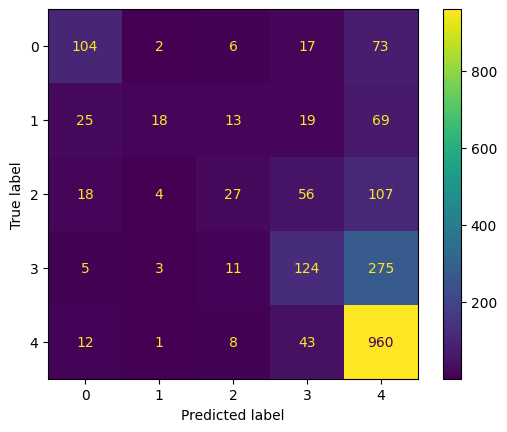

In [283]:
print_confusion_matrix(y_test=y_test, y_pred=lr_y_pred)

### XGBoost

### Random Forest

## 6.0 Hyperparameter tuning

In [284]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

### Logistic Regression Tuning

In [285]:
from sklearn.model_selection import GridSearchCV

In [306]:
lr_parameters = {'C':[1, 10], 'solver': ['sag', 'saga'], 'max_iter': [100, 250, 500, 750, 1000]}
lr_gridsearch = GridSearchCV(lr_model, lr_parameters)
lr_gridsearch.fit(X_train_vectorizer, y_train)
GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C':[1, 10], 'solver': ['sag', 'saga'], 'max_iter': [100, 250, 500, 750, 1000]})

print(lr_gridsearch.best_params_) 
lr_grid_predictions = lr_gridsearch.predict(X_test_vectorizer) 
   
print_classification_report(y_test=y_test, y_pred=lr_grid_predictions, model_name=lr_gridsearch) 

{'C': 10, 'max_iter': 250, 'solver': 'saga'}
Classification report for GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'max_iter': [100, 250, 500, 750, 1000],
                         'solver': ['sag', 'saga']}): 
              precision    recall  f1-score   support

           0     0.6596    0.6139    0.6359       202
           1     0.5000    0.3333    0.4000       144
           2     0.5359    0.3868    0.4493       212
           3     0.5437    0.4617    0.4994       418
           4     0.7392    0.8721    0.8002      1024

    accuracy                         0.6700      2000
   macro avg     0.5957    0.5336    0.5569      2000
weighted avg     0.6515    0.6700    0.6547      2000



In [309]:
rfc_parameters = {'n_estimators':[100, 200], 'criterion':['gini'], 'max_depth':[None, 1, 2]}
rfc_gridsearch = GridSearchCV(forest_classifier, rfc_parameters)
rfc_gridsearch.fit(X_train_vectorizer, y_train)
GridSearchCV(estimator=RandomForestClassifier(), 
             param_grid=rfc_parameters)

print(rfc_gridsearch.best_params_) 
rfc_grid_predictions = rfc_gridsearch.predict(X_test_vectorizer) 
   
print_classification_report(y_test=y_test, y_pred=rfc_grid_predictions, model_name=rfc_gridsearch) 

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Classification report for GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 1, 2],
                         'n_estimators': [100, 200]}): 
              precision    recall  f1-score   support

           0     0.7714    0.5347    0.6316       202
           1     0.7857    0.2292    0.3548       144
           2     0.8571    0.2830    0.4255       212
           3     0.8086    0.3134    0.4517       418
           4     0.6311    0.9775    0.7670      1024

    accuracy                         0.6665      2000
   macro avg     0.7708    0.4676    0.5261      2000
weighted avg     0.7175    0.6665    0.6216      2000



In [ ]:
# lr_model_tuned = LogisticRegression(C=10, max_iter=250, solver='saga')
# lr_model_tuned.fit(X_train_vectorizer, y_train)

# lr_model_tuned_y_preds = lr_model_tuned.predict(X_test_vectorizer)

# print_classification_report(y_test=y_test, y_pred=lr_model_tuned_y_preds, model_name=lr_model_tuned)

## 8.0 Repeat steps 4-7 until satisfied

## 9.0 Proof of Concept

### Let's try to run our models using a different dataset